In [1]:
%matplotlib inline
import research_kit_bottom_trend_follow as rk

backtest_start_time = rk.datetime.now() - rk.timedelta(days=50)
backtest_end_time = rk.datetime.now()

tradingbot = rk.BottomTrendFollow(db_client=rk.mysql_client, exchange_client=rk.bitmex_exchange_client, is_backtest=True)

merged_results = rk.get_joined_params_and_summary()
inversed_results = merged_results.query("inverse_trading == True")

downloading BTC/USD data on bitmex
downloading 2020-01-20 01:09:30 ~ 2020-01-20 02:26:03.021078 data
100.0% completed
Loading OHLCV data from bitmex_original_ohlcv_1min now...
data loaded


In [2]:
id_30531 = rk.generate_transaction_log_by_param(tradingbot, 30, backtest_start_time, backtest_end_time, 5, 
                                      3, 1, True, True, random_forest_leverage_adjust=False, auto_bulk_insert=True, random_leverage=False)
print(id_30531)
params_df_30531, summary_df_30531, transaction_log_df_30531 = rk.get_params_summary_log_df_by_summary_id(id_30531)

Loading OHLCV data from bitmex_original_ohlcv_1min now...
dataset size: 71875
bottom_trend_tick=>5 midle_trend_tick=>3 top_trend_tick=>1 time:0:00:00.227962
53


In [3]:
id_30532 = rk.generate_transaction_log_by_param(tradingbot, 30, backtest_start_time, backtest_end_time, 5, 
                                      3, 2, True, True, random_forest_leverage_adjust=False, auto_bulk_insert=True, random_leverage=False)
print(id_30532)
params_df_30532, summary_df_30532, transaction_log_df_30532 = rk.get_params_summary_log_df_by_summary_id(id_30532)

Loading OHLCV data from bitmex_original_ohlcv_1min now...
dataset size: 71875
bottom_trend_tick=>5 midle_trend_tick=>3 top_trend_tick=>2 time:0:00:00.259508
54


In [4]:
params_30531_30532 = rk.pd.DataFrame(data=[params_df_30531, params_df_30532], index=[str(id_30531), str(id_30532)])
summary_30531_30532 = rk.pd.DataFrame(data=[summary_df_30531, summary_df_30532], index=[str(id_30531), str(id_30532)])
rk.pd.set_option('display.expand_frame_repr', False)

print(params_30531_30532.T)
print(summary_30531_30532.T)

                                                53                   54
backtest_summary_id                             53                   54
bot_name                       bottom_trend_follow  bottom_trend_follow
timeframe                                       30                   30
version                                     v1.0.0               v1.0.0
close_position_on_do_nothing                     1                    1
inverse_trading                                  1                    1
random_leverage                                  0                    0
random_forest_leverage_adjust                    0                    0
bottom_trend_tick                                5                    5
middle_trend_tick                                3                    3
top_trend_tick                                   1                    2
                                                           53                   54
total_median                                     -3.3

transaction log loading from summary_id:53
transaction log loading from summary_id:54


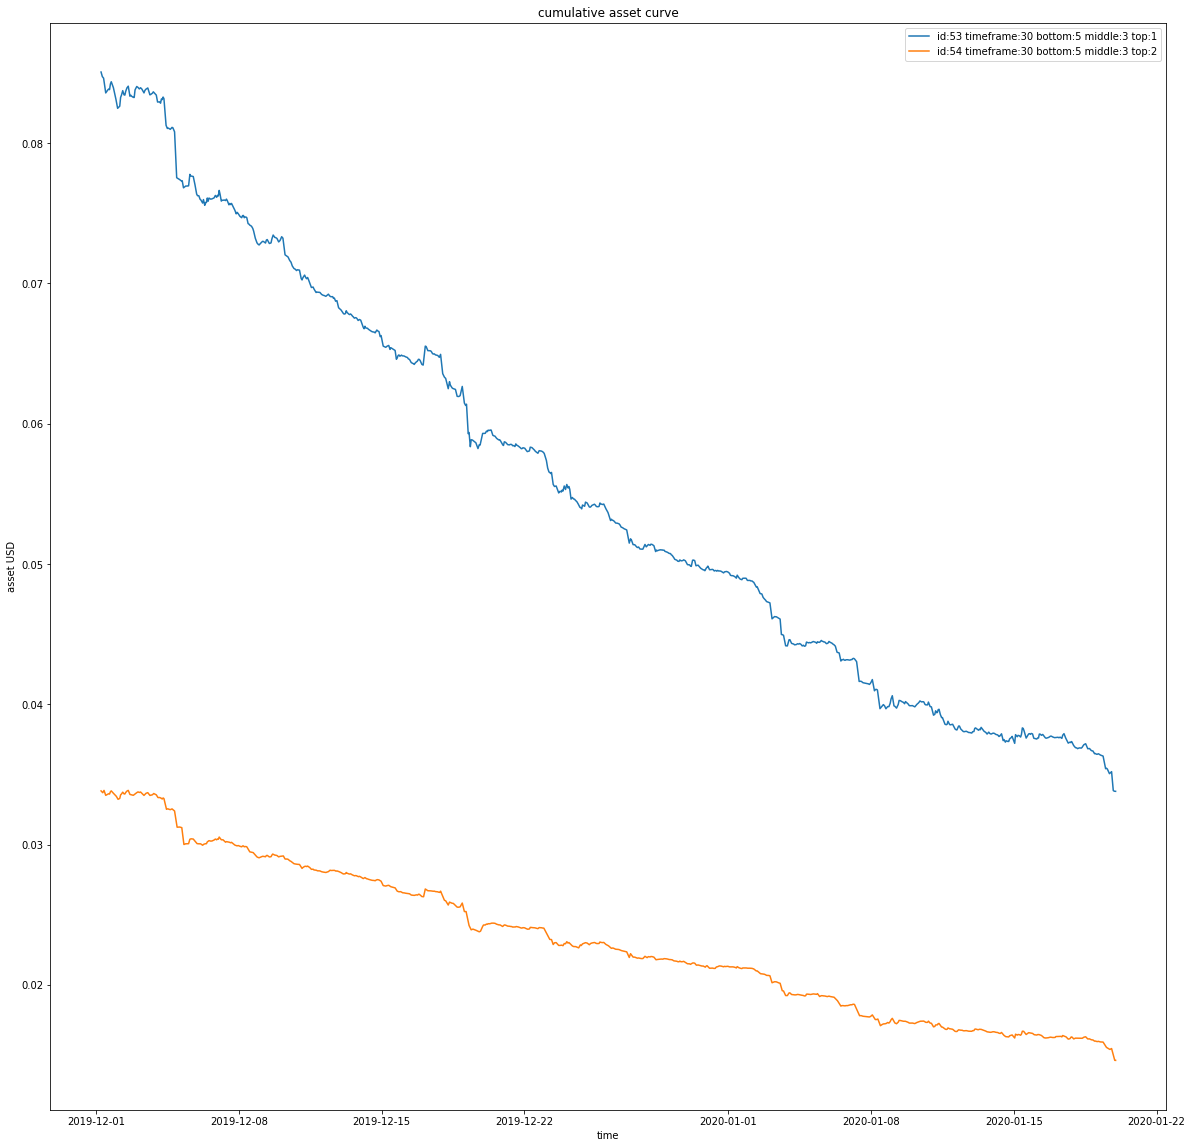

In [5]:
a = [i for i in [id_30531, id_30532]]
rk.generate_asset_curve_by_summary_ids(a)